# Chapter 3 — Sample Statistics and Hypothesis Testing (Code Companion)

This notebook accompanies Chapter 3 of the book and provides executable examples illustrating fundamental concepts in statistical inference for biomedical data analysis. 

We focus on descriptive statistics, hypothesis testing, parametric and non-parametric methods, categorical data analysis, and multiple testing corrections. Each section includes minimal but representative code examples designed to reinforce conceptual understanding rather than provide production-ready pipelines.

All analyses use synthetic or illustrative data to emphasize methodology, assumptions, and interpretation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Reproducibility
rng = np.random.default_rng(42)

# Plotting style (keep consistent with the book)
sns.set_theme(style="whitegrid", context="talk")


## Descriptive Statistics

Descriptive statistics provide a first summary of biomedical data, allowing us to understand central tendency, variability, and distributional shape before performing any inferential analysis. 

In biomedical research, this step is essential for identifying outliers, skewed distributions, and potential data quality issues that may affect downstream statistical tests.

A quick descriptive summary (sample size, central tendency, dispersion, and quartiles) often reveals skewness, outliers, and scale differences that influence the choice of statistical test.

In [ ]:
import numpy as np

# Tiny descriptive summary on a small example vector (replace with your own variable if needed)
x = np.array([148, 154, 158, 160, 161, 162, 166, 170, 182, 195, 236], dtype=float)

print("n =", x.size)
print("mean =", x.mean())
print("median =", np.median(x))
print("std (ddof=1) =", x.std(ddof=1))
print("min/max =", x.min(), "/", x.max())

q1, q3 = np.percentile(x, [25, 75])
print("Q1/Q3 =", q1, "/", q3)
print("IQR =", q3 - q1)


## Point Estimates and Confidence Intervals

A point estimate is a single numerical value used to estimate an unknown population parameter, such as the mean or proportion. Because point estimates are subject to sampling variability, they are typically accompanied by confidence intervals, which quantify uncertainty around the estimate.

In biomedical contexts, confidence intervals are often more informative than p-values, as they convey both the magnitude and precision of an effect.

## Odds Ratio

The **odds ratio (OR)** is a point estimate commonly used with binary outcomes (e.g., responder vs. non-responder). For a 2×2 table with counts

- *a*: responders in the treatment group
- *b*: non-responders in the treatment group
- *c*: responders in the control group
- *d*: non-responders in the control group

the odds ratio is

**OR = (a/b) / (c/d) = (a·d)/(b·c)**.

Interpretation: **OR > 1** suggests higher odds of response in the treatment group, **OR < 1** suggests lower odds, and **OR = 1** indicates no difference in odds. Because OR estimates can be unstable with small counts, they are typically reported with confidence intervals (and Fisher’s exact test is preferred when expected counts are low).

In [2]:
from scipy.stats.contingency import odds_ratio

res = odds_ratio([[177, 231], [21036, 21019]])

print(res)

OddsRatioResult(statistic=0.7656193313650957)


## Parametric Tests (Mean-Based)
Parametric tests assume that the data follow a specific distribution, typically normal, and that variances are homogeneous across groups. When these assumptions are met, parametric tests are statistically efficient and widely used in biomedical research.

## One-sample and two-sample t-tests

t-tests are used to compare means either against a reference value (one-sample) or between two groups (two-sample). 

In biomedical studies, they are commonly applied to compare biomarker levels between treatment and control groups, provided normality and variance assumptions are reasonable.

In [32]:
import numpy as np
import scipy.stats as stats

np.random.seed(42)

x = stats.t.rvs(10, size=1000)

print(x.shape)

(1000,)


### t-distribution and z-distribution

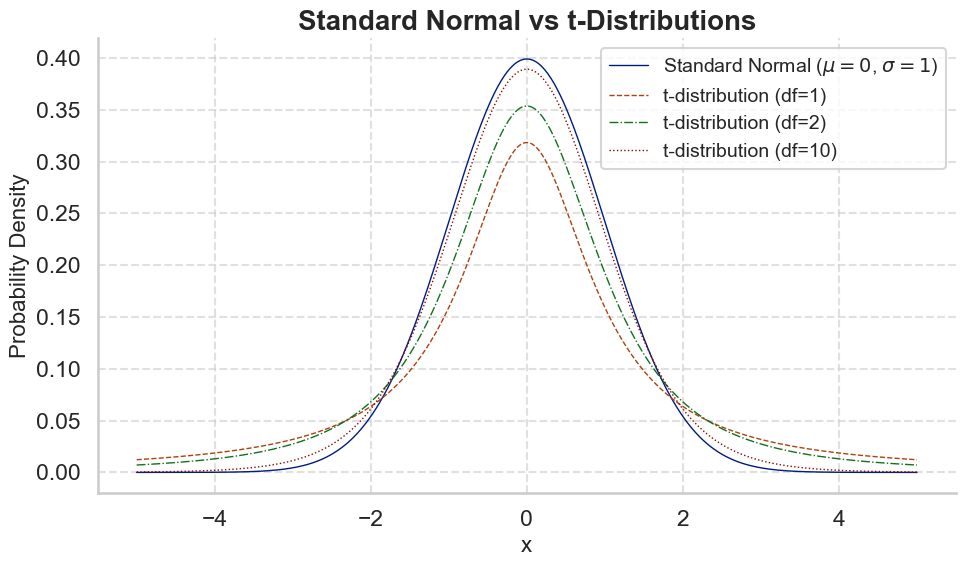

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

np.random.seed(42)

# Set publication-style aesthetics
sns.set_theme(style="whitegrid", context="talk")

# Define the range for x (covering the tails of the distributions)
x = np.linspace(-5, 5, 500)

# Calculate the PDF for the standard normal distribution
y_normal = norm.pdf(x, loc=0, scale=1)

# Calculate the PDFs for t-distributions with different degrees of freedom
y_t1 = t.pdf(x, df=1)
y_t2 = t.pdf(x, df=2)
y_t10 = t.pdf(x, df=10)

colours = sns.color_palette("dark", n_colors=4) 

# Plot all distributions
plt.figure(figsize=(10, 6))
plt.plot(x, y_normal, label='Standard Normal ($\mu=0$, $\sigma=1$)', color=colours[0], linewidth=1)
plt.plot(x, y_t1, label='t-distribution (df=1)', color=colours[1], linestyle='--', linewidth=1)
plt.plot(x, y_t2, label='t-distribution (df=2)', color=colours[2], linestyle='-.', linewidth=1)
plt.plot(x, y_t10, label='t-distribution (df=10)', color=colours[3], linestyle=':', linewidth=1)

# Add title, labels, grid, and legend
plt.xlabel('x', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Standard Normal vs t-Distributions', fontsize=20, fontweight='bold')
plt.legend(frameon=True, fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### One-sample t-test

In [5]:
m, v, s, k = stats.t.stats(11, moments='mvsk')

In [6]:
print('t-statistic = %5.2f pvalue = %5.3f' %(stats.ttest_1samp(x, m)))

t-statistic = -0.00 pvalue = 1.000


In [7]:
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

np.random.seed(42)

x = norm.rvs(loc=20, scale=1, size=1000)
mvsk = norm(loc=20, scale=1).stats(moments='mvsk')
print('t-statistic = %5.2f pvalue = %6.3f' %stats.ttest_1samp(x, mvsk[0]))

t-statistic =  0.62 pvalue =  0.533


### The independent two-sample t-test

In [8]:
import numpy as np
import scipy.stats as stats

np.random.seed(42)

rvs1 = stats.norm.rvs(loc=6, scale=11, size=500)
rvs2 = stats.norm.rvs(loc=6, scale=11, size=500)
stats.ttest_ind(rvs1, rvs2, equal_var=True)

TtestResult(statistic=np.float64(-0.40331379088750186), pvalue=np.float64(0.686803787435964), df=np.float64(998.0))

In [9]:
import numpy as np
import scipy.stats as stats

np.random.seed(42)

rvs1 = stats.norm.rvs(loc=6, scale=11, size=500)
rvs3 = stats.norm.rvs(loc=9, scale=11, size=500)
stats.ttest_ind(rvs1, rvs3, equal_var=True)

TtestResult(statistic=np.float64(-4.805191938625162), pvalue=np.float64(1.7833078254465651e-06), df=np.float64(998.0))

In [10]:
import numpy as np
import scipy.stats as stats

np.random.seed(42)

rvs1 = stats.norm.rvs(loc=6, scale=11, size=500)
rvs4 = stats.norm.rvs(loc=6, scale=6, size=500)
stats.ttest_ind(rvs1, rvs4, equal_var=False)

TtestResult(statistic=np.float64(-0.21065076822400874), pvalue=np.float64(0.8332155060566836), df=np.float64(770.2636052419398))

### Paired t-test

In [11]:
import numpy as np
import scipy.stats as stats

np.random.seed(42)

# Sample data: Before and After measurements (Paired samples)
before = np.random.normal(loc=110, scale=12, size=30)  
after  = before + np.random.normal(loc=-2, scale=5, size=30)  

# Perform paired t-test
t_stat, p_value = stats.ttest_rel(before, after)

# Print results
print(f"Paired t-test statistic: {t_stat:.4f}, pvalue: {p_value:.4f}")

Paired t-test statistic: 3.0657, pvalue: 0.0047


## Multi-group analysis

### One-way Anova
Analysis of Variance (ANOVA) extends the t-test to comparisons across three or more groups. Rather than testing all pairwise differences, ANOVA evaluates whether at least one group mean differs from the others.

If the ANOVA is significant, post-hoc testing is required to identify which groups differ.

In [12]:
import numpy as np
import scipy.stats as stats

np.random.seed(42)

# Example data: Three groups with different means
group1 = np.array([5, 6, 8, 7, 6])
group2 = np.array([10, 12, 11, 9, 13])
group3 = np.array([15, 17, 16, 14, 18])

# Combine groups into a single dataset
data = np.concatenate([group1, group2, group3])
group_labels = ['G1'] * len(group1) + ['G2'] * len(group2) + ['G3'] * len(group3)

# Compute grand mean
grand_mean = np.mean(data)

# Compute SSB (Between-group sum of squares)
ssb = sum(len(g) * (np.mean(g) - grand_mean) ** 2 for g in [group1, group2, group3])

# Compute SSW (Within-group sum of squares)
ssw = sum(np.sum((g - np.mean(g)) ** 2) for g in [group1, group2, group3])

# Compute SST (Total sum of squares)
sst = ssb + ssw  # Alternatively, np.sum((data - grand_mean) ** 2)

# Perform \ac{anova} using SciPy
f_stat, p_value = stats.f_oneway(group1, group2, group3)

# Print results
print(f"SST (Total Sum of Squares): {sst:.4f}")
print(f"SSB (Between-Group Sum of Squares): {ssb:.4f}")
print(f"SSW (Within-Group Sum of Squares): {ssw:.4f}")
print(f"F-statistic: {f_stat:.4f}, pvalue: {p_value:.4f}")

SST (Total Sum of Squares): 255.7333
SSB (Between-Group Sum of Squares): 230.5333
SSW (Within-Group Sum of Squares): 25.2000
F-statistic: 54.8889, pvalue: 0.0000


## Post-hoc Tests
Post-hoc tests are performed after a significant ANOVA result to determine which specific group comparisons drive the observed effect, while controlling for multiple testing.

### Dunnett’s Test

Dunnett’s test is used when multiple treatment groups are compared against a single control group. This design is common in clinical and pharmacological studies and offers greater power than all-pairwise comparisons.

In [13]:
import numpy as np

control = np.array([7.39, 8.46, 7.20, 8.36, 9.83, 8.26])
drug_a = np.array([9.78, 8.82, 7.68, 9.32])
drug_b = np.array([12.77, 9.76, 12.22, 9.16, 10.48])

In [14]:
from scipy.stats import dunnett

res = dunnett(drug_a, drug_b, control=control)

print(f"pvalue: {res.pvalue}")

pvalue: [0.62039067 0.00582799]


## Non-Parametric Tests (Rank-Based)
Non-parametric tests provide robust alternatives when parametric assumptions such as normality or equal variances are violated. These tests rely on ranked data and are particularly useful for small sample sizes or skewed biomedical measurements.

### Wilcoxon Signed-Rank Test

The Wilcoxon signed-rank test is a non-parametric alternative to the paired t-test and is used for comparing matched or repeated measurements, such as pre- and post-treatment biomarker levels.

In [16]:
from scipy.stats import wilcoxon

# Pre- and post-treatment cholesterol levels
pre  = [200, 195, 180, 210, 190]
post = [185, 190, 178, 200, 188]

# Perform the Wilcoxon signed-rank test
stat, p_value = wilcoxon(pre, post)

# Print results
print(f"Wilcoxon statistic: {stat:.4f}, p_value: {p_value:.4f}")

Wilcoxon statistic: 0.0000, p_value: 0.0625


### Mann–Whitney U Test

The Mann–Whitney U test compares two independent groups without assuming normality. It assesses whether values from one group tend to be larger than those from the other.

In [17]:
from scipy.stats import mannwhitneyu

group1 = [7.1, 6.8, 7.5, 8.0]
group2 = [6.2, 5.9, 6.5, 6.8]

# Perform the Mann–Whitney U test
stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

# Print results
print(f"Mann–Whitney U statistic: {stat}, p_value: {p_value}")

Mann–Whitney U statistic: 15.5, p_value: 0.04206641220678083


### Kruskal–Wallis Test

The Kruskal–Wallis test extends the Mann–Whitney U test to more than two independent groups. A significant result indicates that at least one group differs in distribution from the others.

In [18]:
from scipy.stats import kruskal

# Expression levels across three treatment groups
group1 = [5.2, 4.8, 5.1]
group2 = [6.0, 5.9, 6.2]
group3 = [7.1, 7.3, 7.0]
# Perform the Kruskal–Wallis test
stat, p_value = kruskal(group1, group2, group3)

# Print results
print(f"Kruskal–Wallis H statistic: {stat}, p_value: {p_value}")

Kruskal–Wallis H statistic: 7.200000000000003, p_value: 0.02732372244729252


### Friedman Test

The Friedman test is a non-parametric alternative to repeated-measures ANOVA. It is used when the same subjects are measured under multiple conditions and normality assumptions are violated.

In [19]:
from scipy.stats import friedmanchisquare

before = [72, 95, 88, 93, 73, 75, 83]
immediately_after = [122, 120, 134, 120, 101, 97, 109]
five_min_after = [74, 95, 103, 97, 83, 71, 79]
res = friedmanchisquare(before, immediately_after, five_min_after)

print(f"Friedman statistic: {res.statistic:.4f}")
print(f"p_value: {res.pvalue:.6f}")

Friedman statistic: 11.1852
p_value: 0.003725


## Categorical Data Tests

Categorical data tests evaluate relationships between variables that represent discrete categories rather than continuous measurements. These tests are common in epidemiology and clinical research.

### Chi-square Test

The chi-square test assesses whether observed frequencies differ from expected frequencies under the assumption of independence. It is widely used for contingency table analysis in biomedical studies.

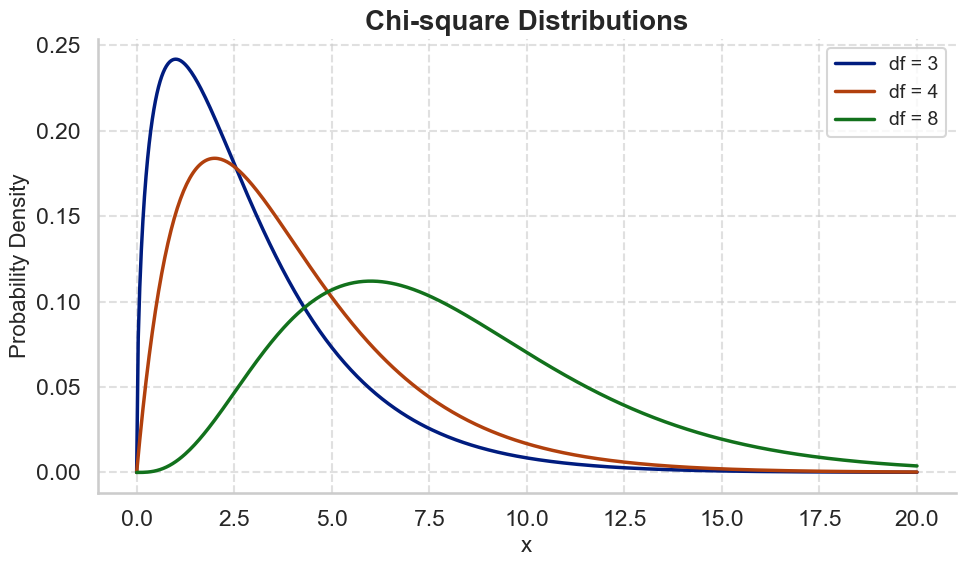

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

np.random.seed(42)

# Set publication-style aesthetics
sns.set_theme(style="whitegrid", context="talk")

# Define the range for the x-axis
x = np.linspace(0, 20, 500)

# Define degrees of freedom
dfs = [3, 4, 8]
colours = sns.color_palette("dark", n_colors=len(dfs)) 

# Create the figure
plt.figure(figsize=(10, 6))

# Plot chi-square distributions
for df, colour in zip(dfs, colours):
    plt.plot(x, chi2.pdf(x, df), label=f'df = {df}', color=colour, linewidth=2.5)

# Add title, labels, grid, and legend
plt.xlabel('x', fontsize=16)
plt.ylabel('Probability Density', fontsize=16)
plt.title('Chi-square Distributions', fontsize=20, fontweight='bold')
plt.legend(frameon=True, fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### Fisher’s Exact Test

Fisher’s exact test provides an exact p-value for contingency tables, making it suitable for small sample sizes where chi-square approximations may be invalid.

In [21]:
from scipy.stats import fisher_exact

# Contingency table: [ [AMS, No AMS], ... ]
table = [[7, 15], [17, 5]]

# One-sided Fisher's exact test (testing for reduction in AMS with treatment)
oddsratio, p_value = fisher_exact(table, alternative='less')

print(f"Odds ratio: {oddsratio:.4f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 0.1373
P-value: 0.0029


## Variance Homogeneity Tests

Many parametric methods assume equal variances across groups. Variance homogeneity tests assess whether this assumption holds before applying mean-based tests.### Levene's test

### Levene’s Test

Levene’s test evaluates equality of variances and is robust to deviations from normality, making it a general-purpose choice in biomedical data analysis.

In [22]:
import numpy as np
from scipy import stats

small_dose = np.array([4.3, 11.5, 7.6, 6.4, 6.3, 10.0, 11.9, 11.6, 5.0, 7.2, 15.2, 21.6, 17.9, 9.0, 13.9, 9.8, 7.8, 9.6, 16.3, 9.2])
medium_dose = np.array([17.2, 16.5, 15.4, 16.9, 22.4, 17.5, 13.3, 14.8, 18.7, 15.5, 19.6, 24.1, 23.7, 26.0, 20.4, 24.8, 25.9, 20.5, 14.1, 27.4])
large_dose = np.array([23.8, 18.4, 34.1, 25.4, 25.8, 32.4, 26.5, 21.8, 23.4, 28.9, 25.6, 26.3, 22.0, 24.7, 25.2, 31.4, 26.1, 27.2, 29.6, 23.3])

res = stats.levene(small_dose, medium_dose, large_dose)

print(f"Levene's test statistic: {res.statistic:.4f}")
print(f"P-value: {res.pvalue:.4f}")

Levene's test statistic: 0.7493
P-value: 0.4773


### Bartlett’s Test

Bartlett’s test is sensitive to variance differences but assumes normality. It is most appropriate when distributional assumptions are satisfied.

In [23]:
import numpy as np
from scipy import stats

small_dose = np.array([4.3, 11.5, 7.6, 6.4, 6.3, 10.0, 11.9, 11.6, 5.0, 7.2, 15.2, 21.6, 17.9, 9.0, 13.9, 9.8, 7.8, 9.6, 16.3, 9.2])
medium_dose = np.array([17.2, 16.5, 15.4, 16.9, 22.4, 17.5, 13.3, 14.8, 18.7, 15.5, 19.6, 24.1, 23.7, 26.0, 20.4, 24.8, 25.9, 20.5, 14.1, 27.4])
large_dose = np.array([23.8, 18.4, 34.1, 25.4, 25.8, 32.4, 26.5, 21.8, 23.4, 28.9, 25.6, 26.3, 22.0, 24.7, 25.2, 31.4, 26.1, 27.2, 29.6, 23.3])

res = stats.bartlett(small_dose, medium_dose, large_dose)
print(f"Bartlett's test statistic: {res.statistic:.4f}")
print(f"P-value: {res.pvalue:.4f}")

Bartlett's test statistic: 0.6436
P-value: 0.7248


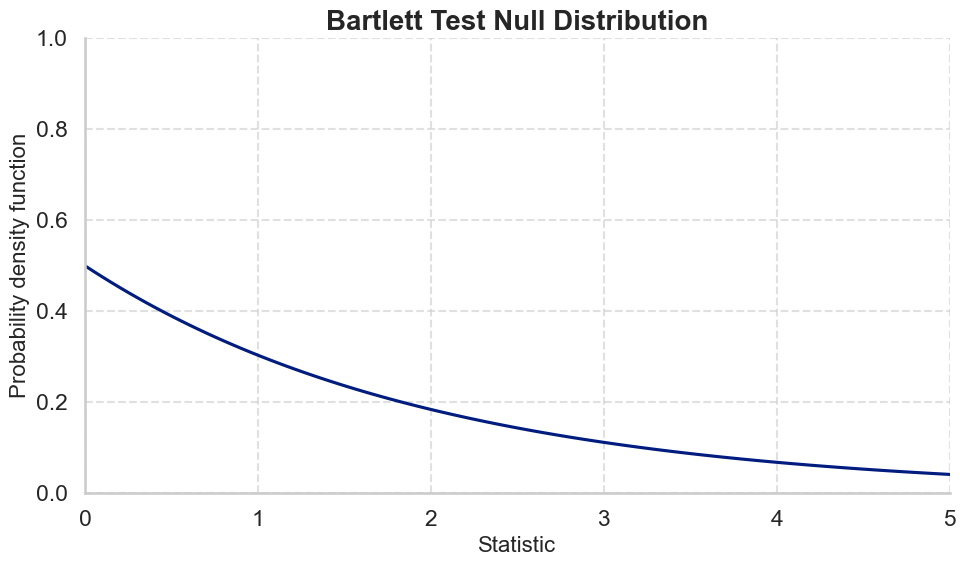

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

np.random.seed(42)

# Set publication-style aesthetics
sns.set_theme(style="whitegrid", context="talk")

# Number of samples
k = 3 
dist = stats.chi2(df=k-1)
val  = np.linspace(0, 5, 100)
pdf  = dist.pdf(val)

colours = sns.color_palette("dark") 

# Create the figure
plt.figure(figsize=(10, 6))

plt.plot(val, pdf, color=colours[0])
plt.xlim(0, 5)
plt.ylim(0, 1)

# Add title, labels, and grid
plt.xlabel('Statistic', fontsize=16)
plt.ylabel('Probability density function', fontsize=16)
plt.title('Bartlett Test Null Distribution', fontsize=20, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### Fligner–Killeen Test

The Fligner–Killeen test is a fully non-parametric method for testing variance homogeneity and is robust to both non-normality and outliers.

In [25]:
import numpy as np

small_dose = np.array([4.3, 11.5, 7.6, 6.4, 6.3, 10.0, 11.9, 11.6, 5.0, 7.2, 15.2, 21.6, 17.9, 9.0, 13.9, 9.8, 7.8, 9.6, 16.3, 9.2])
medium_dose = np.array([17.2, 16.5, 15.4, 16.9, 22.4, 17.5, 13.3, 14.8, 18.7, 15.5, 19.6, 24.1, 23.7, 26.0, 20.4, 24.8, 25.9, 20.5, 14.1, 27.4])
large_dose = np.array([23.8, 18.4, 34.1, 25.4, 25.8, 32.4, 26.5, 21.8, 23.4, 28.9, 25.6, 26.3, 22.0, 24.7, 25.2, 31.4, 26.1, 27.2, 29.6, 23.3])

from scipy import stats

res = stats.fligner(small_dose, medium_dose, large_dose)
print(f"Fligner-Killeen's test statistic: {res.statistic:.4f}")
print(f"P-value: {res.pvalue:.4f}")

Fligner-Killeen's test statistic: 1.3424
P-value: 0.5111


## Assumption Checking and Distribution Tests

Before applying parametric models, it is essential to assess distributional assumptions such as normality, symmetry, and tail behavior.

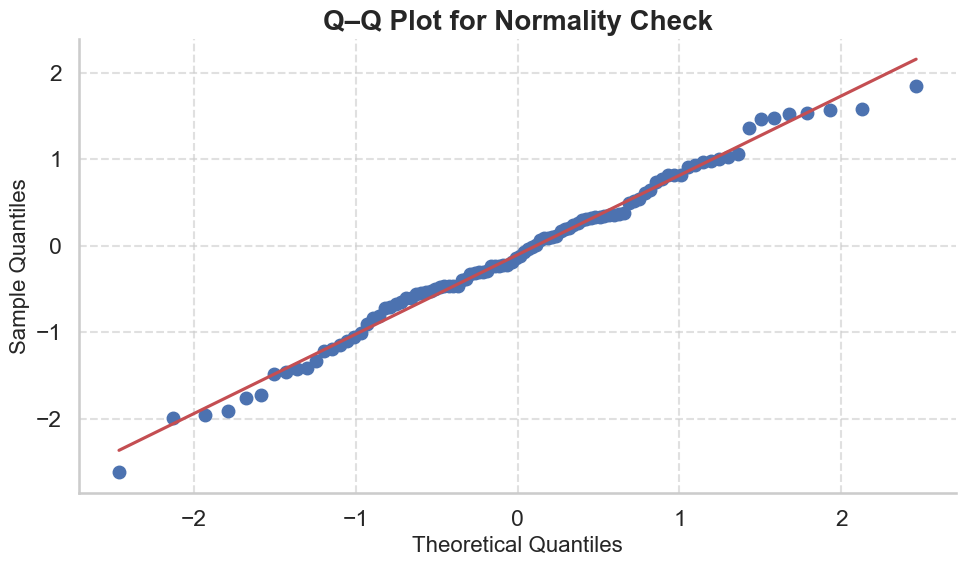

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

np.random.seed(42)

# Set publication-style aesthetics
sns.set_theme(style="whitegrid", context="talk")

# Example: generate sample data
data = np.random.normal(loc=0, scale=1, size=100)  # Normally distributed

# Create the figure
plt.figure(figsize=(10, 6))

# Generate Q–Q plot
stats.probplot(data, dist="norm", plot=plt)

# Add title, labels, and grid
plt.xlabel('Theoretical Quantiles', fontsize=16)
plt.ylabel('Sample Quantiles', fontsize=16)
plt.title('Q–Q Plot for Normality Check', fontsize=20, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

### Shapiro–Wilk Test

The Shapiro–Wilk test assesses whether a sample is consistent with a normal distribution and is especially powerful for small to moderate sample sizes.

In [27]:
import numpy as np
from scipy import stats

x = np.array([148, 154, 158, 160, 161, 162, 166, 170, 182, 195, 236])

res = stats.shapiro(x)
print(f"Test statistic: {res.statistic:.4f}")
print(f"P-value: {res.pvalue:.4f}")

Test statistic: 0.7888
P-value: 0.0067


### Skewness and Kurtosis Tests

Skewness and kurtosis tests quantify asymmetry and tail heaviness, respectively, providing complementary information to formal normality tests.

In [28]:
import numpy as np
from scipy import stats

x = np.array([146, 152, 159, 161, 163, 164, 167, 171, 184, 198, 240])

res = stats.kurtosistest(x)
print(f"Kurtosis test statistic: {res.statistic:.4f}")
print(f"P-value: {res.pvalue:.6f}")

Kurtosis test statistic: 2.1988
P-value: 0.027893


In [29]:
import numpy as np
from scipy import stats

x = np.array([146, 152, 159, 161, 163, 164, 167, 171, 184, 198, 240])

res = stats.skewtest(x)
print(f"Skewness test statistic: {res.statistic:.4f}")
print(f"P-value: {res.pvalue:.4f}")

Skewness test statistic: 2.6548
P-value: 0.0079


## Correlation Analysis

Correlation analysis measures the strength and direction of association between variables. In biomedical research, correlation is often used for exploratory analysis but must be interpreted carefully, as correlation does not imply causation.

### Pearson Correlation

Pearson’s correlation coefficient measures linear association between two continuous variables and assumes approximate normality.

In [30]:
import numpy as np
from scipy.stats import pearsonr

# Total collagen (mg/g dry weight of liver)
x = np.array([7.0, 7.3, 7.3, 8.1, 9.4, 10.9, 11.1])

# Free proline (μ mole/g dry weight of liver)
y = np.array([2.7, 3.1, 2.8, 2.5, 3.5, 4.9, 4.7])

# Compute the Pearson correlation
res = pearsonr(x, y)
print(f"Pearson correlation coefficient: {res.statistic:.4f}")
print(f"P-value: {res.pvalue:.4f}")

Pearson correlation coefficient: 0.9301
P-value: 0.0024


### Spearman Correlation

Spearman’s rank correlation assesses monotonic relationships using ranked data and is robust to non-normality and outliers.

In [31]:
import numpy as np
from scipy import stats

# Total collagen (mg/g dry weight of liver)
x = np.array([7.0, 7.3, 7.3, 8.1, 9.4, 10.9, 11.1])

# Free proline (μ mole/g dry weight of liver)
y = np.array([2.7, 3.1, 2.8, 2.5, 3.5, 4.9, 4.7])

# Compute the Spearman correlation
res = stats.spearmanr(x, y)
print(f"Spearman correlation coefficient: {res.statistic:.4f}")
print(f"P-value: {res.pvalue:.4f}")

Spearman correlation coefficient: 0.7388
P-value: 0.0579
